## Assignment

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_feature_engineering_1/solution.ipynb).

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [25]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [26]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

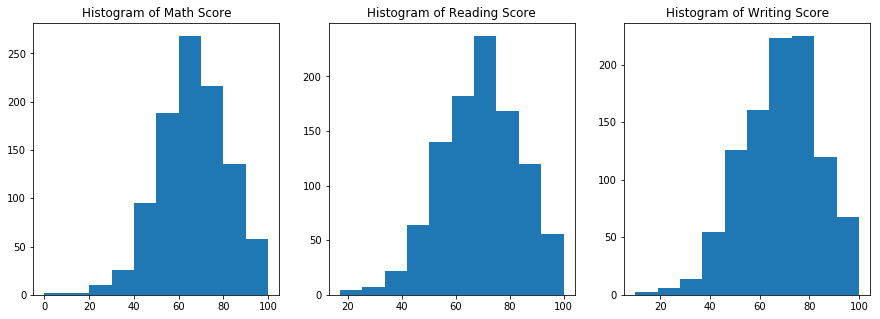

In [27]:
# plot distribution of exam scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(student_df['math score'])
plt.title('Histogram of Math Score')

plt.subplot(1,3,2)
plt.hist(student_df['reading score'])
plt.title('Histogram of Reading Score')

plt.subplot(1,3,3)
plt.hist(student_df['writing score'])
plt.title('Histogram of Writing Score')

plt.show()

In [28]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.log(student_df['math score']))
norm_stats = normaltest(np.log(student_df['math score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(student_df['reading score']))
norm_stats = normaltest(np.log(student_df['reading score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(student_df['writing score']))
norm_stats = normaltest(np.log(student_df['writing score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is nan and p value is nan
Normality test statistics is nan and p value is nan
Jarque-Bera test statistics is 495.1273179446674 and p value is 0.0
Normality test statistics is 209.7715093472919 and p value is 2.8099300901335873e-46
Jarque-Bera test statistics is 1410.937006925743 and p value is 0.0
Normality test statistics is 318.9692123027676 and p value is 5.454005856377552e-70


In [29]:
# replace 0 value in math score
student_df["math score"].replace(0, 1, inplace=True)

In [30]:
print(student_df['math score'].min())
print(student_df['reading score'].min())
print(student_df['writing score'].min())

1
17
10


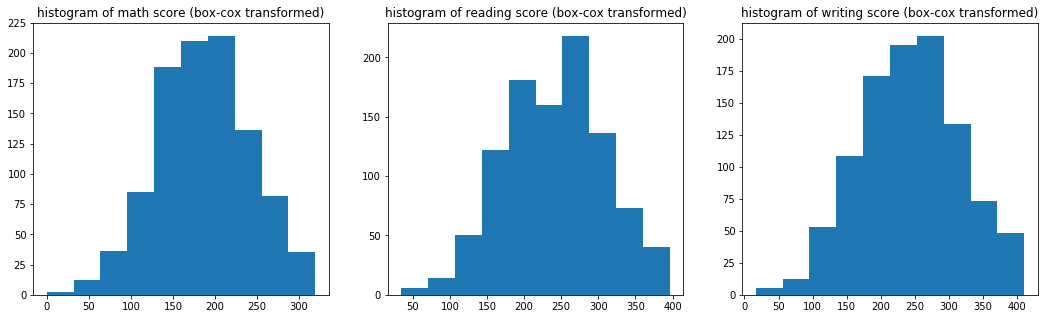

In [31]:
from scipy.stats import boxcox

math_score_boxcox,_ = boxcox(student_df['math score'])
reading_score_boxcox,_ = boxcox(student_df['reading score'])
writing_score_boxcox,_ = boxcox(student_df['writing score'])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

In [23]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.log(student_df['math score']))
norm_stats = normaltest(np.log(student_df['math score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(student_df['reading score']))
norm_stats = normaltest(np.log(student_df['reading score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(student_df['writing score']))
norm_stats = normaltest(np.log(student_df['writing score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 88453.34560096625 and p value is 0.0
Normality test statistics is 943.2832064280929 and p value is 1.4745322925815238e-205
Jarque-Bera test statistics is 495.1273179446674 and p value is 0.0
Normality test statistics is 209.7715093472919 and p value is 2.8099300901335873e-46
Jarque-Bera test statistics is 1410.937006925743 and p value is 0.0
Normality test statistics is 318.9692123027676 and p value is 5.454005856377552e-70


They are not distributed normally. Jarque-Bera and Normal tests also confirm this:

In [52]:

jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 0.9589875596660145 and p value is 0.6190967117358159
Normality test statistics is 0.9034198455639313 and p value is 0.636538788347859
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


**Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.**

In [35]:
student_df['weighted_avg'] = (student_df['math score'] + student_df['reading score'] + student_df['writing score'])/3

In [36]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,weighted_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


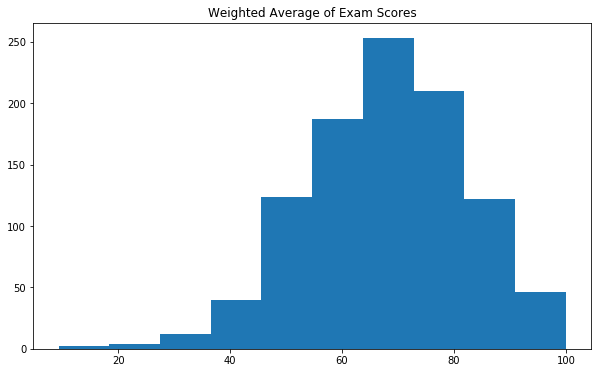

Jarque-Bera test statistics is 15.299648399479786 and p value is 0.0004761278250606793
Normality test statistics is 15.039484104419722 and p value is 0.0005422724257804356


In [50]:
plt.figure(figsize=(10,6))

plt.hist(student_df['weighted_avg'])
plt.title('Weighted Average of Exam Scores')
plt.show()

jb_stats = jarque_bera(student_df['weighted_avg'])
norm_stats = normaltest(student_df['weighted_avg'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The new variable is not normally distributed.

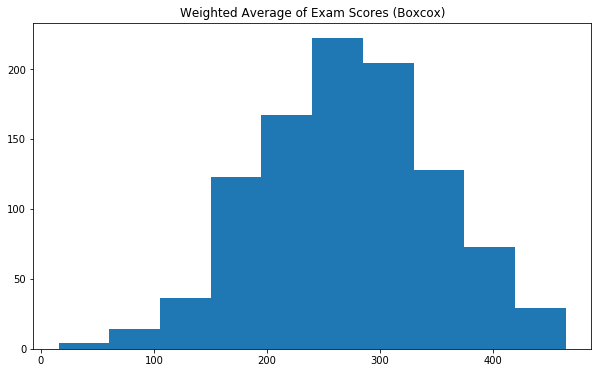

Jarque-Bera test statistics is 2.4521724525282615 and p value is 0.29343878623193853
Normality test statistics is 2.802992852045368 and p value is 0.24622822579114062


In [51]:
weighted_avg_boxcox,_ = boxcox(student_df["weighted_avg"])

plt.figure(figsize=(10,6))

plt.hist(weighted_avg_boxcox)
plt.title('Weighted Average of Exam Scores (Boxcox)')
plt.show()

jb_stats = jarque_bera(weighted_avg_boxcox)
norm_stats = normaltest(weighted_avg_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

After we applied Box-Cox transformation, the transformed variable is now normally distributed. Jarque-Bera and Normal tests also confirm this.

**Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?**

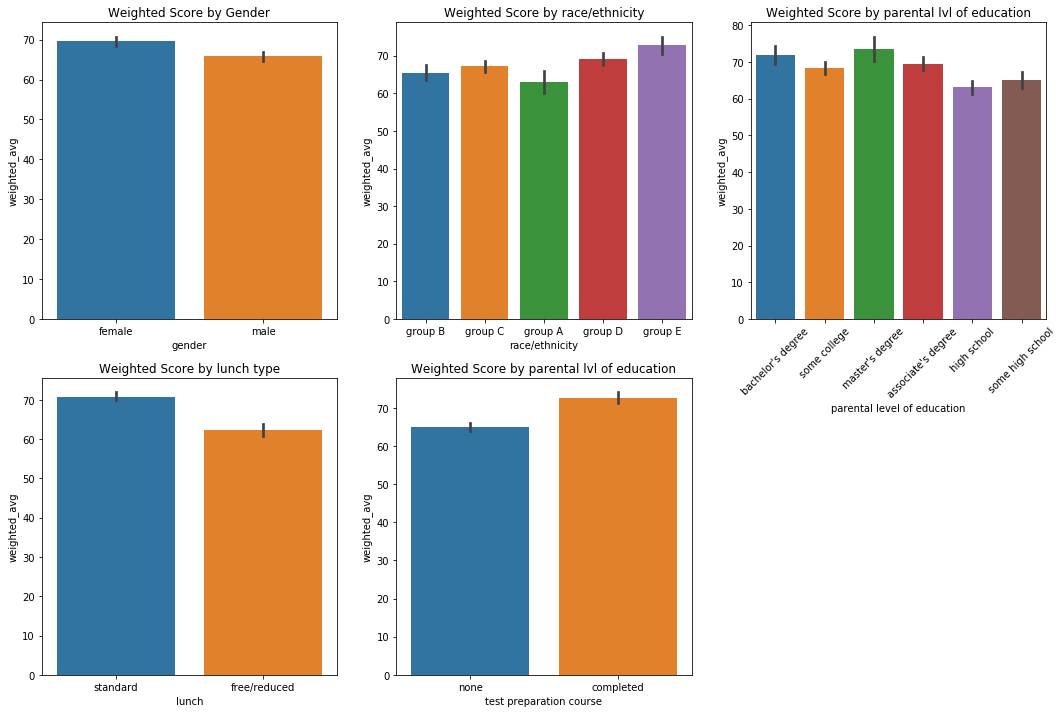

In [43]:
plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
sns.barplot(student_df['gender'], student_df['weighted_avg'])
plt.title('Weighted Score by Gender')

plt.subplot(2,3,2)
sns.barplot(student_df['race/ethnicity'], student_df['weighted_avg'])
plt.title('Weighted Score by race/ethnicity')

plt.subplot(2,3,3)
sns.barplot(student_df['parental level of education'], student_df['weighted_avg'])
plt.title('Weighted Score by parental lvl of education')
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.barplot(student_df['lunch'], student_df['weighted_avg'])
plt.title('Weighted Score by lunch type')

plt.subplot(2,3,5)
sns.barplot(student_df['test preparation course'], student_df['weighted_avg'])
plt.title('Weighted Score by test prep course')

plt.show()

In [44]:
# Test whether group differences in gender are significant.
gender = student_df["gender"].unique()
grouped_df = student_df.groupby("gender")
for var in ["weighted_avg"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gender)):
        for j in range(i+1, len(gender)):
            print("t-test between groups {0} and {1}:".format(gender[i], gender[j]))
            print(stats.ttest_ind(
                student_df[student_df["gender"]==gender[i]][var], 
                student_df[student_df["gender"]==gender[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_avg
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=4.171053325796944, pvalue=3.2957326127100595e-05)


In [45]:
# Test whether group differences in race/ethnicity are significant.
ethnicity = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["weighted_avg"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicity)):
        for j in range(i+1, len(ethnicity)):
            print("t-test between groups {0} and {1}:".format(ethnicity[i], ethnicity[j]))
            print(stats.ttest_ind(
                student_df[student_df["race/ethnicity"]==ethnicity[i]][var], 
                student_df[student_df["race/ethnicity"]==ethnicity[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_avg
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.2792916499151854, pvalue=0.20137953396368105)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3165043669633527, pvalue=0.1890930589509443)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.8031083992077255, pvalue=0.005279949204374891)
t-test between groups group B and group E:
Ttest_indResult(statistic=-4.46037807261396, pvalue=1.1254806793764281e-05)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.4678153289736646, pvalue=0.01400544509418023)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.805761931098656, pvalue=0.07147476028471314)
t-test between groups group C and group E:
Ttest_indResult(statistic=-3.9359759707094657, pvalue=9.576071038206596e-05)
t-test between groups group A and gro

In [46]:
# Test whether group differences in parental level of education are significant.
lvl_education = student_df["parental level of education"].unique()
grouped_df = student_df.groupby("parental level of education")
for var in ["weighted_avg"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lvl_education)):
        for j in range(i+1, len(lvl_education)):
            print("t-test between groups {0} and {1}:".format(lvl_education[i], lvl_education[j]))
            print(stats.ttest_ind(
                student_df[student_df["parental level of education"]==lvl_education[i]][var], 
                student_df[student_df["parental level of education"]==lvl_education[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_avg
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.200746866670862, pvalue=0.028421853941795295)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.7594769500339048, pvalue=0.4485891321202008)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.5013009645983189, pvalue=0.13421131516223408)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.539323736236874, pvalue=6.457780161976827e-08)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.9419499984338855, pvalue=0.00010099530538860417)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.5596520690466438, pvalue=0.010997532204148747)
t-test between groups some college and associate's degr

In [48]:
# Test whether group differences in parental level of education are significant.
lunch = student_df["lunch"].unique()
grouped_df = student_df.groupby("lunch")
for var in ["weighted_avg"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunch)):
        for j in range(i+1, len(lunch)):
            print("t-test between groups {0} and {1}:".format(lunch[i], lunch[j]))
            print(stats.ttest_ind(
                student_df[student_df["lunch"]==lunch[i]][var], 
                student_df[student_df["lunch"]==lunch[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_avg
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=9.574982380767507, pvalue=7.745757182670126e-21)


In [49]:
# Test whether group differences in parental level of education are significant.
test_prep = student_df["test preparation course"].unique()
grouped_df = student_df.groupby("test preparation course")
for var in ["weighted_avg"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(test_prep)):
        for j in range(i+1, len(test_prep)):
            print("t-test between groups {0} and {1}:".format(test_prep[i], test_prep[j]))
            print(stats.ttest_ind(
                student_df[student_df["test preparation course"]==test_prep[i]][var], 
                student_df[student_df["test preparation course"]==test_prep[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_avg
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-8.391197414595661, pvalue=1.6304993260896713e-16)


The most significant categorical variables that relate to the target variable are test prep course and lunch type.

**SOLUTIONS RESULTS TO QUESTION 3**

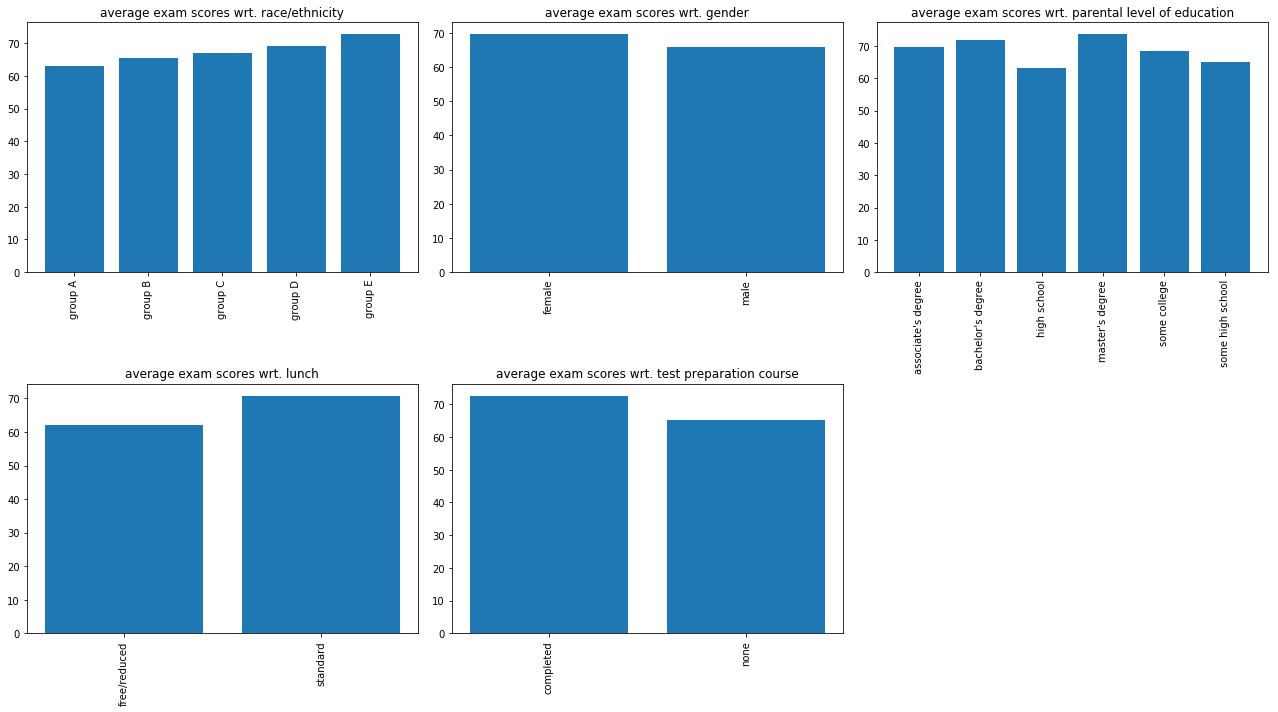

In [57]:
exam_score = (student_df["math score"] +
              student_df["reading score"] + student_df["writing score"])/3

student_df["weighted_avg"] = exam_score

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(student_df.groupby("race/ethnicity")
        ["weighted_avg"].mean().index, student_df.groupby("race/ethnicity")["weighted_avg"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(student_df.groupby("gender")
        ["weighted_avg"].mean().index, student_df.groupby("gender")["weighted_avg"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(student_df.groupby("parental level of education")
        ["weighted_avg"].mean().index, student_df.groupby("parental level of education")["weighted_avg"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(student_df.groupby("lunch")
        ["weighted_avg"].mean().index, student_df.groupby("lunch")["weighted_avg"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(student_df.groupby("test preparation course")
        ["weighted_avg"].mean().index, student_df.groupby("test preparation course")["weighted_avg"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

1. Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.

2. Female students seem to be more successful than the males.

3. There is also some variation between the parental levels of education with respect to the exam scores.

4. Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something that affects both the lunch type and the exam scores.

5. Those who completed the test preparation course seem to be more successful than the others.

Considering all these, all variables might be used in explaining the success in the exams but the lunch variable should be used precautiously.